# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [55]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)
# cities.to_csv("weather 2", index=False, header=True)

['tromso', 'jamestown', 'east london', 'punta arenas', 'saratoga springs', 'mar del plata', 'busselton', 'mount isa', 'severo-kurilsk', 'portland', 'ambunti', 'rikitea', 'goianinha', 'vaini', 'saskylakh', 'niigata', 'atuona', 'port alfred', 'mataura', 'coihaique', 'taolanaro', 'kloulklubed', 'ponta do sol', 'iqaluit', 'hay river', 'laguna', 'yellowknife', 'tuatapere', 'albany', 'bethel', 'bredasdorp', 'lebu', 'puerto ayora', 'new norfolk', 'lukovetskiy', 'rungata', 'quatre cocos', 'kapaa', 'palmer', 'hobyo', 'honiara', 'narsaq', 'cape town', 'thompson', 'san quintin', 'kangaatsiaq', 'bubaque', 'raudeberg', 'ribeira grande', 'dikson', 'hobart', 'kodiak', 'castro', 'lompoc', 'bilibino', 'alenquer', 'vardo', 'barentsburg', 'asau', 'amahai', 'port elizabeth', 'alihe', 'barrow', 'tuktoyaktuk', 'avarua', 'imbituba', 'lorengau', 'yulara', 'oktyabrskoye', 'kavieng', 'colares', 'awbari', 'kyaukse', 'sao joao da barra', 'muisne', 'grindavik', 'cidreira', 'khatanga', 'margate', 'ngunguru', 'batai

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [56]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "Metric"
query_url=f"{url}appid={api_key}&unites={unit}&q="
# city = "Toronto"
# test= requests.get(query_url+city).json()
# test
lat =[]
lon =[]
city_name=[]
country=[]
date=[]
maxtemp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
for city in cities:
    data=requests.get(query_url+city).json()
    try:
        city_name.append(data['name'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        lat.append(data['coord']['lat'])
        lon.append(data['coord']['lon'])
        humidity.append(data['main']['humidity'])
        maxtemp.append(data['main']['temp_max'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
    except:
        print(f"the city name:{city}")            

the city name:taolanaro
the city name:rungata
the city name:barentsburg
the city name:asau
the city name:belushya guba
the city name:satitoa
the city name:bolungarvik
the city name:tabiauea
the city name:illoqqortoormiut
the city name:mys shmidta
the city name:saleaula
the city name:kuche
the city name:sembe
the city name:lolua
the city name:andenes
the city name:dalneye konstantinovo
the city name:ybytimi
the city name:falealupo
the city name:grand centre
the city name:marcona
the city name:teneguiban
the city name:tsihombe
the city name:axixa do tocantins
the city name:kamenskoye
the city name:eldikan
the city name:ust-kamchatsk
the city name:chokwe
the city name:bengkulu
the city name:nizhneyansk
the city name:ruatoria
the city name:ajtos
the city name:grand river south east
the city name:amderma
the city name:umzimvubu
the city name:ngukurr
the city name:raga
the city name:camana
the city name:samalaeulu
the city name:toulepleu
the city name:mbacke
the city name:halalo
the city nam

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
maxtemp_c=[] 
for i in maxtemp:
    maxtemp_c.append(i- 273.15)

dict = {"Latitude":lat,
        "Longitude":lon,
        "Cities":city_name,
        "Country":country,
        "Date":date,
        "Max Temp(C)":maxtemp_c,
        "Humidity(%)":humidity,
        "Cloudiness(%)":cloudiness,
        "Wind Speed(meter/sec)":wind_speed
       }
weather_data = pd.DataFrame(dict)
weather_data.to_csv("weather 2/weather_data.csv",index=False, header=True)
dict_pd.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

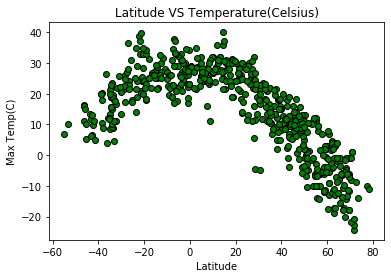

In [78]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp(C)"],marker = "o",facecolors="green", edgecolors="black" )
plt.xlabel("Latitude")
plt.ylabel("Max Temp(C)")
plt.title('Latitude VS Temperature(Celsius)')
plt.savefig('weather 2/lat vs temp')
plt.show()

#### Latitude vs. Humidity Plot

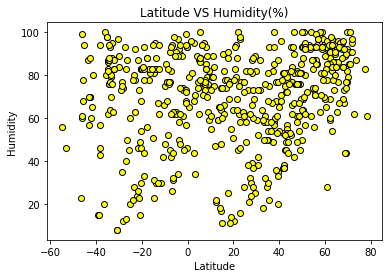

In [80]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity(%)"],marker = "o",facecolors="yellow", edgecolors="black" )
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('Latitude VS Humidity(%)')
plt.savefig('weather 2/lat vs humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

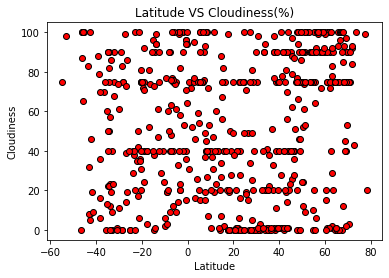

In [82]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness(%)"],marker = "o",facecolors="red", edgecolors="black" )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Latitude VS Cloudiness(%)')
plt.savefig('weather 2/lat vs Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed(meter/sec)"],marker = "o",facecolors="red", edgecolors="black" )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(")
plt.title('Latitude VS Cloudiness(%)')
plt.savefig('weather 2/lat vs Cloudiness')
plt.show()